In [108]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense,Dropout,Flatten
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras import backend as K
from sklearn import metrics
from kerastuner.tuners import RandomSearch

/var/folders/vp/9wfwkvfx5h91ypvhb3pbp5f80000gp/T/ipykernel_28907/4121548056.py:11: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [5]:
img_rows,img_cols=28,28

In [79]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [65]:
arr=mnist.load_data()

In [78]:
arr[0][1]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [63]:
mnist.load_data()[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [81]:
x_train.shape

(60000, 28, 28)

In [82]:
x_test.shape

(10000, 28, 28)

In [83]:
y_train.shape

(60000,)

In [84]:
y_test.shape

(10000,)

In [85]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [86]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Text(0.5, 1.0, 'Ground Truth:5')

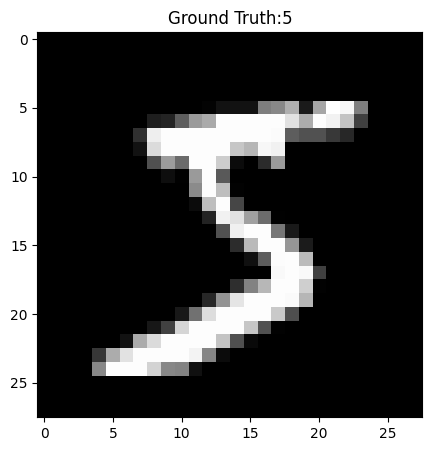

In [87]:
plt.figure(figsize=(10,5))
plt.imshow(x_train[0],cmap='gray')
plt.title('Ground Truth:{}'.format(y_train[0]))

#Data Preparation

In [88]:
#convert y variable 
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [89]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [90]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
#convert x variable in required format
#1-Gray scale
#3-colored

In [91]:
if K.image_data_format=='channels_first':
    x_train=x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
    X_test=x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
    input_shape=(1,img_rows,img_cols)
else:
    x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    X_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape=(img_rows,img_cols,1)
    

In [92]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [93]:
x_train/=255
x_test/=255

#Define Model

In [182]:
def build_model(hp):
    model=Sequential()
    #32 is no of feature maps
   # model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
#     model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Flatten())
#kernel_size=hp.Choice('convkernel_'+str(i),values=[3,5]
    model.add(Conv2D(filters=hp.Int('convfilter',32,128,16),kernel_size=hp.Choice('convkernel',values=[3,5]),
                     activation=hp.Choice('act',['relu','sigmoid']),input_shape=input_shape))
    model.add(Conv2D(filters=hp.Int('convfilter',32,128,16),kernel_size=hp.Choice('convkernel',values=[3,5]),
                     activation=hp.Choice('act',['relu','sigmoid'])))
           
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    for i in range(hp.Int('layers',2,6)):

        model.add(Dense(units=hp.Int('units_'+ str(i),32,300,50),
                        activation=hp.Choice('act_' + str(i),['relu','sigmoid'])))
    model.add(Dense(10,activation='softmax'))
    model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.legacy.Adam(),metrics=['accuracy'])
    return model

In [183]:
tuner=RandomSearch(build_model,objective='val_accuracy',max_trials=3,max_retries_per_trial=3,project_name='helloworld6')

In [184]:
tuner.search_space_summary()

Search space summary
Default search space size: 8
convfilter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
convkernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
act (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 300, 'step': 50, 'sampling': 'linear'}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 300, 'step': 50, 'sampling': 'linear'}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}


In [185]:
tuner.search(x_train,y_train,epochs=4,validation_data=(x_test,y_test))

Trial 3 Complete [00h 09m 21s]
val_accuracy: 0.11349999904632568

Best val_accuracy So Far: 0.9902999997138977
Total elapsed time: 00h 30m 55s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [186]:
tuner.results_summary()

Results summary
Results in ./helloworld6
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
convfilter: 112
convkernel: 3
act: relu
layers: 2
units_0: 282
act_0: relu
units_1: 182
act_1: sigmoid
units_2: 132
act_2: sigmoid
Score: 0.9902999997138977

Trial 0 summary
Hyperparameters:
convfilter: 112
convkernel: 3
act: sigmoid
layers: 3
units_0: 232
act_0: relu
units_1: 282
act_1: relu
units_2: 32
act_2: relu
Score: 0.9800000190734863

Trial 2 summary
Hyperparameters:
convfilter: 96
convkernel: 3
act: sigmoid
layers: 2
units_0: 282
act_0: sigmoid
units_1: 232
act_1: relu
units_2: 282
act_2: relu
Score: 0.11349999904632568


In [187]:
model=Sequential()
#32 is no of feature maps
model.add(Conv2D(112,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(112,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(282,activation='relu'))
model.add(Dense(182,activation='sigmoid'))
model.add(Dense(132,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [188]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 112)       1120      
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 112)       113008    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 112)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16128)             0         
                                                                 
 dense_3 (Dense)             (None, 282)               4548378   
                                                                 
 dense_4 (Dense)             (None, 182)               51506     
                                                      

In [50]:
import tensorflow as tf

In [189]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.legacy.Adam(),metrics=['accuracy'])

In [190]:
model.fit(x_train,y_train,epochs=5,batch_size=600,verbose=1,validation_data=(x_test,y_test))

Epoch 1/5
100/100 [==============================] - 120s 1s/step - loss: 0.6953 - accuracy: 0.8470 - val_loss: 0.1338 - val_accuracy: 0.9710
Epoch 2/5
100/100 [==============================] - 136s 1s/step - loss: 0.0900 - accuracy: 0.9792 - val_loss: 0.0626 - val_accuracy: 0.9845
Epoch 3/5
100/100 [==============================] - 143s 1s/step - loss: 0.0468 - accuracy: 0.9890 - val_loss: 0.0460 - val_accuracy: 0.9883
Epoch 4/5
100/100 [==============================] - 160s 2s/step - loss: 0.0301 - accuracy: 0.9927 - val_loss: 0.0382 - val_accuracy: 0.9892
Epoch 5/5
100/100 [==============================] - 155s 2s/step - loss: 0.0206 - accuracy: 0.9954 - val_loss: 0.0400 - val_accuracy: 0.9880


In [142]:
#model.get_weights()

In [191]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.0400 - accuracy: 0.9880


[0.0399814248085022, 0.9879999756813049]

In [100]:
model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


array([[0.0961668 , 0.09472816, 0.09436318, ..., 0.10832692, 0.11002784,
        0.10806496],
       [0.10205082, 0.09070817, 0.10697487, ..., 0.09282182, 0.10703458,
        0.10829058],
       [0.09594178, 0.10919978, 0.10043672, ..., 0.10531284, 0.10215625,
        0.09721278],
       ...,
       [0.10023436, 0.09645243, 0.09414558, ..., 0.0993248 , 0.11167458,
        0.10467795],
       [0.1000089 , 0.0992799 , 0.09946838, ..., 0.0956068 , 0.11259334,
        0.0998663 ],
       [0.10713822, 0.08326667, 0.10708821, ..., 0.08323184, 0.10875215,
        0.09968216]], dtype=float32)

In [192]:
pred_y=np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 5s 17ms/step


In [193]:
input_y=np.argmax(y_test,axis=1)

In [194]:
print(metrics.classification_report(input_y,pred_y))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.97      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

